# Yelp Reviews EDA

What we've got here is a rather in-depth analysis exploring the best (and possibly worst) features that restaurants have to offer in the main British Columbia metro cities. Some things we're hoping to find out are which restaurant categories score the highest ratings, which cities are the most popular destinations for the top rated restaurants, and many other bits of information we can extract out of the data in front of us.

I've definitely skipped over some of the pieces of data that could be explored but what I've got is what I'm happy with so far. Needless to say there's plenty of opportunity to explore some more things down the road, and if you find something interesting yourself, hit me up and we can chat about it!

## Table of Contents:
 - [Importing the Data](#Importing-the-Data)
 - [Exploring the Data](#Exploring-the-Data)
     - [Star Rating Distribution](#Star-Rating-Distribution-over-all-Business)
     - [Cuisine Types](#Cuisine-Types)
     - [Top Restaurants & Cities](#Top-Restaurants-&-Cities)
     - [Mapping things out](#Mapping-it-out)

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()
pd.set_option("display.max_columns", None)
%config InlineBackend.figure_format = 'retina'

import plotly.offline as pyo
from plotly.offline import iplot, plot
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pyo.init_notebook_mode(connected=True)
pio.renderers.default = "notebook_connected"

import config

print("Setup Complete.")

Setup Complete.


### Importing the Data

In [75]:
# reading in data
business_df = pd.read_csv('../data/can_yelp_businesses.csv')
reviews_df = pd.read_csv('../data/can_yelp_reviews.csv')

In [76]:
print(business_df.shape)
business_df.head()

(7506, 14)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,V5V,49.251342,-123.101333,3.5,169,1,"{'GoodForKids': 'True', 'Alcohol': ""u'none'"", ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'..."
1,QciD6FbNklaJvUbLExD4Nw,ARGO,"3790 Canada Way, Unit 108",Burnaby,BC,V5G 1G4,49.254436,-123.020050,4.0,76,1,"{'WheelchairAccessible': 'False', 'Restaurants...","Food Delivery Services, Food, Restaurants, Med...","{'Monday': '0:0-0:0', 'Tuesday': '11:30-21:0',..."
2,Xi2GGNzOiUS8r6WCFvu-fw,Kerala Kitchen,103- 9386 120 Street,Surrey,BC,V3V 4B9,49.173723,-122.889641,4.0,9,1,"{'BusinessParking': ""{'garage': False, 'street...","Indian, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
3,NoPXKdIwRzflOW-5exFAqA,1st Avenue Seafood by Pocha,901 Lougheed Hwy,Coquitlam,BC,V3K 3T3,49.237547,-122.872628,4.0,12,0,"{'Ambience': ""{'touristy': False, 'hipster': F...","Restaurants, Korean, Seafood","{'Tuesday': '11:30-23:0', 'Wednesday': '11:30-..."
4,jfDfHzAq6iKkRnzzZ4n1nQ,Let's Roll Custom Sushi Bar,"1184 Denman Street, Suite 104",Vancouver,BC,V6G 2M9,49.286360,-123.140261,4.5,31,0,"{'RestaurantsAttire': ""u'casual'"", 'HasTV': 'F...","Restaurants, Canadian (New), Sushi Bars, Ameri...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."


In [77]:
print(reviews_df.shape)
reviews_df.sample(5)

(426790, 18)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,user_id,review_stars,text,date
145531,LklghlHetMds8vGlEshMjg,Tangent Cafe,2095 Commercial Drive,Vancouver,BC,V5N 4B1,49.266077,-123.069709,3.5,118,1,"{'BikeParking': 'True', 'BusinessParking': ""{'...","Malaysian, Breakfast & Brunch, Restaurants, Di...","{'Monday': '8:0-15:0', 'Tuesday': '8:0-15:0', ...",fUK_HC03ZX_KiLcduclFMQ,3,Pretty disappointed but just an A-OK because p...,2016-10-30 08:44:40
31324,IApa8s-StZo2QcXOyu35tg,Little Minh's,7533 Market Crossing,Burnaby,BC,V5J 0A3,49.198576,-122.978286,4.5,83,1,"{'BikeParking': 'True', 'RestaurantsReservatio...","Bars, Sports Bars, Soup, Nightlife, Restaurant...","{'Monday': '11:0-20:0', 'Tuesday': '11:0-20:0'...",RtGqdDBvvBCjcu5dUqwfzA,4,Atmosphere: medium - enough seating inside\n\n...,2019-04-03 04:38:50
109939,ecocBvk-QjEuuwT0jducsg,The Local Omnivore,337 E Hastings,Vancouver,BC,V6A 1P3,49.281554,-123.096622,4.0,5,0,"{'BikeParking': 'True', 'RestaurantsPriceRange...","Burgers, Food Trucks, Food, Restaurants",NaN,oQjD_ZI7q7-riVjxjnrW3Q,5,"Forget about five guy's, white spot, or gourme...",2015-07-09 23:45:26
16894,O9KCg8IfPtbNSlk7M0OdSQ,Johnnie Fox's Irish Snug,1033 Granville Street,Vancouver,BC,V6Z 1L4,49.278962,-123.123755,4.0,111,1,"{'HasTV': 'True', 'RestaurantsTakeOut': 'True'...","Restaurants, Nightlife, Pubs, Bars, Irish","{'Monday': '11:30-1:0', 'Tuesday': '11:30-1:0'...",pORx59rBx7YIMlu1Q2vJ3A,2,Prime rib dinner with Yorkshire. Awful. Beef w...,2019-05-18 21:19:56
30116,NWyAvEo2rDZg-1wU4GwJZQ,Coast Restaurant,1054 Alberni Street,Vancouver,BC,V6E 1A3,49.284624,-123.123233,3.5,528,1,"{'RestaurantsAttire': ""u'dressy'"", 'BusinessPa...","Seafood, Restaurants","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",nJRrAg81uFa8XunBhk1IYA,5,Coast is the type of hip sophisticated seafood...,2011-07-19 04:00:18


### Exploring the Data

#### Star Rating Distribution over all Business

Now that we've got our data loaded in let's check out the distribution of the ratings for businesses.

In [78]:
x = business_df['stars'].value_counts().index
y = business_df['stars'].value_counts().values

colors = ['#f72585', '#b5179e', '#7209b7', '#560bad', '#480ca8', '#3a0ca3', '#3f37c9', '#4361ee', '#4895ef']

fig = go.Figure(data=[go.Bar(
            x=x,
            y=y,
            text=y,
            textposition='auto',
            marker={'color':colors}
)])
fig.update_layout(title="Star Rating Distribution",
                 xaxis_title="Star Rating",
                 yaxis_title="Count",
                 )
fig.show()

#### Cuisine Types

Check distribution of types of cuisine

In [79]:
# getting the categories
print(business_df['categories'].value_counts())

Chinese, Restaurants                                                                                              144
Restaurants, Chinese                                                                                              136
Restaurants, Pizza                                                                                                118
Pizza, Restaurants                                                                                                114
Japanese, Restaurants                                                                                              85
                                                                                                                 ... 
Bars, Lounges, Canadian (New), Nightlife, Restaurants                                                               1
Restaurants, Coffee & Tea, Food, Filipino                                                                           1
Restaurants, South African, African, Portuguese, Chicken

In [80]:
biz_category = ' '.join(business_df['categories'])
biz_cat = biz_category.split(',')

biz_category_df = pd.DataFrame(biz_category.split(','), columns=['category'])

print(biz_category_df.category.value_counts())

 Restaurants                    2963
 Food                           1444
 Restaurants Restaurants         696
 Nightlife                       508
 Coffee & Tea                    501
                                ... 
 Grocery Food                      1
 Caterers Wine Bars                1
 Nightlife Indian                  1
 Local Flavor Canadian (New)       1
 Videos & Video Game Rental        1
Name: category, Length: 2806, dtype: int64


In [81]:
# plotly version

x = biz_category_df.category.value_counts(ascending=False)
top_20 = x.iloc[:20]

fig = px.bar(top_20, x=top_20.values, y=top_20.index, text=top_20.values, orientation='h', 
             color=top_20.index, 
             color_discrete_sequence=px.colors.qualitative.Alphabet_r)
fig.update_layout(xaxis=dict(
        title="Count", 
        titlefont=dict(size=16)), 
                  yaxis=dict(
                      title="Business Category", 
                      titlefont=dict(size=16)),
                 height=700,
                 width=1000,
                 title="Top 20 Business Categories",
                 )
fig.show()

#### Top Restaurants & Cities
##### By Review Count, Ratings & # of Restaurants

Let's have a look at which restaurants are the most reviewed

In [82]:
business_df[['name', 'stars', 'review_count', 'city']].sort_values(by="review_count", ascending=False)[:50]

,name,stars,review_count,city
234,Medina Cafe,4.0,2302,Vancouver
3247,Miku,4.5,1805,Vancouver
4530,Chambar,4.0,1356,Vancouver
2393,Phnom Penh,4.0,1306,Vancouver
2416,Jam Cafe on Beatty,4.5,1097,Vancouver
6116,The Flying Pig - Yaletown,4.0,1092,Vancouver
1143,Joe Fortes Seafood & Chop House,4.0,1037,Vancouver
2503,Twisted Fork,4.0,1032,Vancouver
3810,Japadog,4.0,987,Vancouver
2576,Hokkaido Ramen Santouka,4.0,949,Vancouver


Which city has the most reviews & the highest average rating?

In [83]:
business_df[['name', 'stars', 'review_count', 'city']].groupby(['city']).agg({'review_count': 'sum', 'stars': 'mean'}).sort_values(by="review_count", ascending=False)[:50]

,review_count,stars
city,,
Vancouver,296073,3.511228
Richmond,38498,3.253333
Burnaby,27425,3.353746
North Vancouver,12720,3.480822
Coquitlam,10161,3.393189
New Westminster,9272,3.461207
Surrey,7024,3.385762
West Vancouver,3324,3.524272
Port Moody,2525,3.422535


Vancouver dominates the restaurant industry in BC clearly, with 47 out of the top 50 restaurants.

Checking the number of businesses in each city.

In [84]:
business_df[['city', 'business_id']].groupby(['city'])['business_id'].agg('count').sort_values(ascending=False)

city
Vancouver              4275
Richmond                900
Burnaby                 694
North Vancouver         365
Coquitlam               323
Surrey                  302
New Westminster         232
Port Coquitlam          109
West Vancouver          103
Delta                    97
Port Moody               71
Bowen Island             14
Steveston                 2
BURNABY                   2
New Westminister          2
Ladner                    2
Greater Vancouver A       2
NEW WESTMINSTER           1
PORT COQUITLAM            1
N Vancouver               1
Lions Bay                 1
Port coquitlam            1
RICHMOND                  1
RichMond                  1
SURREY                    1
Fraser Heights            1
Downtown Vancouver        1
Newwestminster            1
Name: business_id, dtype: int64

Now we can see why Vancouver was the city with the most reviews, it's got the most restaurants by quite a large margin!

**Improving the grammatical cosmetics**

There's some city names that are weirdly spelled. We'll have to fix that so we have proper counts of restaurants in each city.

In [85]:
business_df['city'] = business_df['city'].replace(['New Westminister', 'NEW WESTMINSTER', 'Newwestminster'], 'New Westminster')
business_df['city'] = business_df['city'].replace(['BURNABY'], 'Burnaby')
business_df['city'] = business_df['city'].replace(['SURREY'], 'Surrey')
business_df['city'] = business_df['city'].replace(['PORT COQUITLAM', 'Port coquitlam'], 'Port Coquitlam')
business_df['city'] = business_df['city'].replace(['RICHMOND', 'RichMond'], 'Richmond')
business_df['city'] = business_df['city'].replace(['N Vancouver'], 'North Vancouver')

In [86]:
business_df['city'].value_counts()

Vancouver              4275
Richmond                902
Burnaby                 696
North Vancouver         366
Coquitlam               323
Surrey                  303
New Westminster         236
Port Coquitlam          111
West Vancouver          103
Delta                    97
Port Moody               71
Bowen Island             14
Ladner                    2
Steveston                 2
Greater Vancouver A       2
Lions Bay                 1
Fraser Heights            1
Downtown Vancouver        1
Name: city, dtype: int64

**Some more naming errors to take care of...**

Let's rename the "Downtown Vancouver" location to just "Vancouver". Clean up "Greater Vancouver A" to "Greater Vancouver". There's a possibility that "Greater Vancouver" is just "North Vancouver" but we'll leave that thought aside for now and not look into it too much.

In [87]:
business_df['city'] = business_df['city'].replace(['Greater Vancouver A'], 'Greater Vancouver')
business_df['city'] = business_df['city'].replace(['Downtown Vancouver'], 'Vancouver')

In [88]:
business_df[['city', 'business_id']].groupby(['city'])['business_id'].agg('count').sort_values(ascending=False)

city
Vancouver            4276
Richmond              902
Burnaby               696
North Vancouver       366
Coquitlam             323
Surrey                303
New Westminster       236
Port Coquitlam        111
West Vancouver        103
Delta                  97
Port Moody             71
Bowen Island           14
Ladner                  2
Greater Vancouver       2
Steveston               2
Lions Bay               1
Fraser Heights          1
Name: business_id, dtype: int64

In [89]:
cities = business_df['city'].value_counts()

fig = px.bar(cities, x=cities.values, y=cities.index, text=cities.values, orientation='h', color=cities.index, color_discrete_sequence=px.colors.sequential.Agsunset)
fig.update_layout(xaxis=dict(
        title="Count", 
        titlefont=dict(size=16)), 
                  yaxis=dict(
                      title="City", 
                      titlefont=dict(size=16)),
                 height=700,
                 width=1000,
                 title="Number of Businesses per City")
fig.show()

Since the city names were fixed, let's see the average number of stars and the total review count for each city again

In [90]:
business_df[['name', 'stars', 'review_count', 'city']].groupby(['city']).agg({'review_count': 'sum', 'stars': 'mean'}).sort_values(by="review_count", ascending=False)[:50]

,review_count,stars
city,,
Vancouver,296104,3.511342
Richmond,38635,3.253326
Burnaby,27515,3.352730
North Vancouver,12754,3.480874
Coquitlam,10161,3.393189
New Westminster,9322,3.447034
Surrey,7038,3.386139
West Vancouver,3324,3.524272
Port Coquitlam,2564,3.576577


Check the highest average rating per cuisine type

In [91]:
category_stars_df = business_df[['categories', 'stars']]
category_stars_df.sample(5)

,categories,stars
2860,"Restaurants, American (New), Breakfast & Brunc...",3.5
3690,"Restaurants, Asian Fusion, Gluten-Free, Americ...",2.5
6862,"American (Traditional), Nightlife, Restaurants...",3.0
5101,"Restaurants, American (Traditional)",4.5
4622,"Sushi Bars, Restaurants, Shopping, Shopping Ce...",3.5


In [92]:
category_stars_df[['categories', 'stars']].groupby(['categories'])['stars'].agg('mean').sort_values(ascending=False)

categories
Coffee & Tea, Food, Breakfast & Brunch, Restaurants, Sandwiches             5.0
Bubble Tea, Tea Rooms, Food, Cafes, Coffee & Tea, Restaurants               5.0
Food, Bubble Tea, Restaurants, Cafes, Juice Bars & Smoothies                5.0
Bars, Fish & Chips, Seafood, Restaurants, Cocktail Bars, Nightlife          5.0
Korean, Sandwiches, Restaurants, Waffles                                    5.0
                                                                           ... 
Food Delivery Services, Restaurants, Chicken Wings, Pizza, Food, Italian    1.0
Restaurants, Food, Donuts, Sandwiches, Coffee & Tea                         1.0
Fast Food, Pizza, Food, Restaurants                                         1.0
American (New), Restaurants, Chinese                                        1.0
Food Delivery Services, Salad, Restaurants, Food, Pizza                     1.0
Name: stars, Length: 4677, dtype: float64

In [93]:
category_stars_df.shape

(7506, 2)

**Top 50 most reviewed restaurants**

In [94]:
top_50 = business_df[['name', 'stars', 'review_count', 'city']].sort_values(ascending=False, by="review_count")[:50]
top_50.head()

,name,stars,review_count,city
234,Medina Cafe,4.0,2302,Vancouver
3247,Miku,4.5,1805,Vancouver
4530,Chambar,4.0,1356,Vancouver
2393,Phnom Penh,4.0,1306,Vancouver
2416,Jam Cafe on Beatty,4.5,1097,Vancouver


#### Mapping it out

What I would like to do next is visualize the highest ratings by review count in a map to be able to see where the most popular areas are. To do this, I've found that Plotly Mapbox is a great tool that renders a really clean map showing every distinct point that we need.

In [95]:
px.set_mapbox_access_token(config.mapbox_access_token)
fig = px.scatter_mapbox(data_frame=business_df, lat='latitude', lon='longitude',
                        color='stars', size='review_count', hover_name='name',
                        color_continuous_scale=px.colors.cyclical.IceFire)
fig.update_layout(mapbox_style="carto-positron")
fig.show(renderer="notebook_connected");

In [96]:
import gmaps
import gmaps.datasets

In [97]:
gmaps.configure(api_key=config.gmaps_api_key)

In [98]:
lat = business_df['latitude'].values
long = business_df['longitude'].values
rest_locations = list(zip(lat, long))
fig = gmaps.figure()
rest_map = gmaps.heatmap_layer(rest_locations)
fig.add_layer(rest_map)
fig

Figure(layout=FigureLayout(height='420px'))

**Clustering**

Let's add some points on the map above that show the main centroids (k-means clustering) of where the hot spots for restaurants are. we have to import k-means from scikit-learn first and then we'll create a clustering function and add that as a layer on the map.

In [99]:
from sklearn.cluster import KMeans

In [100]:
def k_rest_clusters(k):
    """Use KMeans algorithm to find k clusters of restaurants"""
    kmeans = KMeans(n_clusters=k).fit(rest_locations)
    clusters = kmeans.cluster_centers_
    return clusters

In [101]:
kmeans_rest = k_rest_clusters(6)
kmeans_rest

array([[  49.27303402, -123.1841523 ],
       [  49.20356937, -122.89905881],
       [  49.27769719, -123.11163568],
       [  49.1728437 , -123.13301491],
       [  49.25046077, -123.01979243],
       [  49.25366457, -122.80858357]])

Adding the centroids to the Google Map above.

In [102]:
cluster_centers_layer = gmaps.symbol_layer(kmeans_rest, fill_color='black', stroke_color='blue', scale=5)
fig.add_layer(cluster_centers_layer)
fig

Figure(layout=FigureLayout(height='420px'))

We can do some more visualizations to get more info but I'll stop for now. After some further EDA, turn this section into a streamlit app (look at NYC uber pickups demo app for inspo). Next I'll do NLP analysis on the reviews dataset, analyze sentiment & polarity, visualize words for positive and negative reviews in a wordcloud. Maybe dos ome topic modeling (LDA). Final big component is to make a restaurant recommender

In [103]:
list_cat = []
for category in business_df['categories']:
    list_cat.append(category.split(','))

print(list_cat[:20])

[['Restaurants', ' Thai'], ['Food Delivery Services', ' Food', ' Restaurants', ' Mediterranean', ' Greek', ' Pizza'], ['Indian', ' Restaurants'], ['Restaurants', ' Korean', ' Seafood'], ['Restaurants', ' Canadian (New)', ' Sushi Bars', ' American (New)'], ['Seafood', ' Restaurants', ' Fish & Chips'], ['Restaurants', ' Pizza'], ['Restaurants', ' Chinese'], ['Food', ' Coffee & Tea', ' Restaurants', ' Cafes'], ['Chinese', ' Restaurants'], ['Restaurants', ' Indian'], ['Canadian (New)', ' Cocktail Bars', ' Bars', ' Nightlife', ' Restaurants', ' Sushi Bars'], ['Bars', ' Restaurants', ' Sandwiches', ' American (Traditional)', ' Cocktail Bars', ' Chicken Shop', ' Nightlife'], ['Restaurants', ' Pizza'], ['Bars', ' Lounges', ' Nightlife', ' Cafes', ' Restaurants', ' Hookah Bars'], ['Filipino', ' Noodles', ' Restaurants'], ['Food', ' Ethnic Food', ' Mexican', ' Specialty Food', ' Restaurants'], ['Burgers', ' Restaurants', ' Coffee & Tea', ' Fast Food', ' Food'], ['Restaurants', ' Italian', ' Pizz

In [104]:
list_cat[:25]

[['Restaurants', ' Thai'],
 ['Food Delivery Services',
  ' Food',
  ' Restaurants',
  ' Mediterranean',
  ' Greek',
  ' Pizza'],
 ['Indian', ' Restaurants'],
 ['Restaurants', ' Korean', ' Seafood'],
 ['Restaurants', ' Canadian (New)', ' Sushi Bars', ' American (New)'],
 ['Seafood', ' Restaurants', ' Fish & Chips'],
 ['Restaurants', ' Pizza'],
 ['Restaurants', ' Chinese'],
 ['Food', ' Coffee & Tea', ' Restaurants', ' Cafes'],
 ['Chinese', ' Restaurants'],
 ['Restaurants', ' Indian'],
 ['Canadian (New)',
  ' Cocktail Bars',
  ' Bars',
  ' Nightlife',
  ' Restaurants',
  ' Sushi Bars'],
 ['Bars',
  ' Restaurants',
  ' Sandwiches',
  ' American (Traditional)',
  ' Cocktail Bars',
  ' Chicken Shop',
  ' Nightlife'],
 ['Restaurants', ' Pizza'],
 ['Bars', ' Lounges', ' Nightlife', ' Cafes', ' Restaurants', ' Hookah Bars'],
 ['Filipino', ' Noodles', ' Restaurants'],
 ['Food', ' Ethnic Food', ' Mexican', ' Specialty Food', ' Restaurants'],
 ['Burgers', ' Restaurants', ' Coffee & Tea', ' Fast Fo

In [105]:
list_cat = [category.split(',') for category in business_df['categories']]

In [106]:
list_cat[:20]

[['Restaurants', ' Thai'],
 ['Food Delivery Services',
  ' Food',
  ' Restaurants',
  ' Mediterranean',
  ' Greek',
  ' Pizza'],
 ['Indian', ' Restaurants'],
 ['Restaurants', ' Korean', ' Seafood'],
 ['Restaurants', ' Canadian (New)', ' Sushi Bars', ' American (New)'],
 ['Seafood', ' Restaurants', ' Fish & Chips'],
 ['Restaurants', ' Pizza'],
 ['Restaurants', ' Chinese'],
 ['Food', ' Coffee & Tea', ' Restaurants', ' Cafes'],
 ['Chinese', ' Restaurants'],
 ['Restaurants', ' Indian'],
 ['Canadian (New)',
  ' Cocktail Bars',
  ' Bars',
  ' Nightlife',
  ' Restaurants',
  ' Sushi Bars'],
 ['Bars',
  ' Restaurants',
  ' Sandwiches',
  ' American (Traditional)',
  ' Cocktail Bars',
  ' Chicken Shop',
  ' Nightlife'],
 ['Restaurants', ' Pizza'],
 ['Bars', ' Lounges', ' Nightlife', ' Cafes', ' Restaurants', ' Hookah Bars'],
 ['Filipino', ' Noodles', ' Restaurants'],
 ['Food', ' Ethnic Food', ' Mexican', ' Specialty Food', ' Restaurants'],
 ['Burgers', ' Restaurants', ' Coffee & Tea', ' Fast Fo

In [107]:
business_df['rest_categories'] = list_cat

In [108]:
slim_biz_df = business_df[['name', 'stars', 'rest_categories']]
slim_biz_df.head()

,name,stars,rest_categories
0,Bob Likes Thai Food,3.5,"[Restaurants, Thai]"
1,ARGO,4.0,"[Food Delivery Services, Food, Restaurants, ..."
2,Kerala Kitchen,4.0,"[Indian, Restaurants]"
3,1st Avenue Seafood by Pocha,4.0,"[Restaurants, Korean, Seafood]"
4,Let's Roll Custom Sushi Bar,4.5,"[Restaurants, Canadian (New), Sushi Bars, A..."


In [109]:
slim_biz_df['rest_categories'][55]

['Ramen', ' Tapas/Small Plates', ' Japanese', ' Restaurants']

In [110]:
# the following function needs a HUGE THANK YOU to 'victorchennn' on github
# I was stuck on trying to separate the word 'Restaurants' from the categories
# column for a while until I came across his code, so thank you to him for making
# that code available!

def true_cat_count(data):
    categories = {}
    for row in data.index:
        stars = data.loc[row,]['stars']
        for cat in data.loc[row,]['rest_categories']:
            if cat != 'Restaurants' and cat != ' Restaurants':
                if cat not in categories.keys():
                    categories[cat] = [stars]
                else:
                    categories[cat].append(stars)
                    
    true_categories = pd.DataFrame({'stars':list(categories.values())})
    true_categories.index = categories.keys()
    true_categories['number'] = true_categories['stars'].apply(lambda c: len(c))
    true_categories['percentage'] = true_categories['number'] / len(data) * 100
    true_categories['avg_stars'] = true_categories['stars'].apply(lambda s: sum(s) / len(s))
    true_categories = true_categories.drop(['stars'], axis=1)
    
    return true_categories

In [111]:
category_count = true_cat_count(slim_biz_df)
top_20_cat = category_count.sort_values('number', ascending=False).head(20)
top_20_cat

,number,percentage,avg_stars
Food,1871,24.926725,3.531267
Chinese,677,9.019451,3.314623
Coffee & Tea,647,8.619771,3.510819
Japanese,631,8.406608,3.505547
Nightlife,626,8.339995,3.508786
Bars,602,8.020250,3.498339
Cafes,531,7.074341,3.747646
Breakfast & Brunch,515,6.861178,3.496117
Sandwiches,515,6.861178,3.541748
Sushi Bars,459,6.115108,3.472767


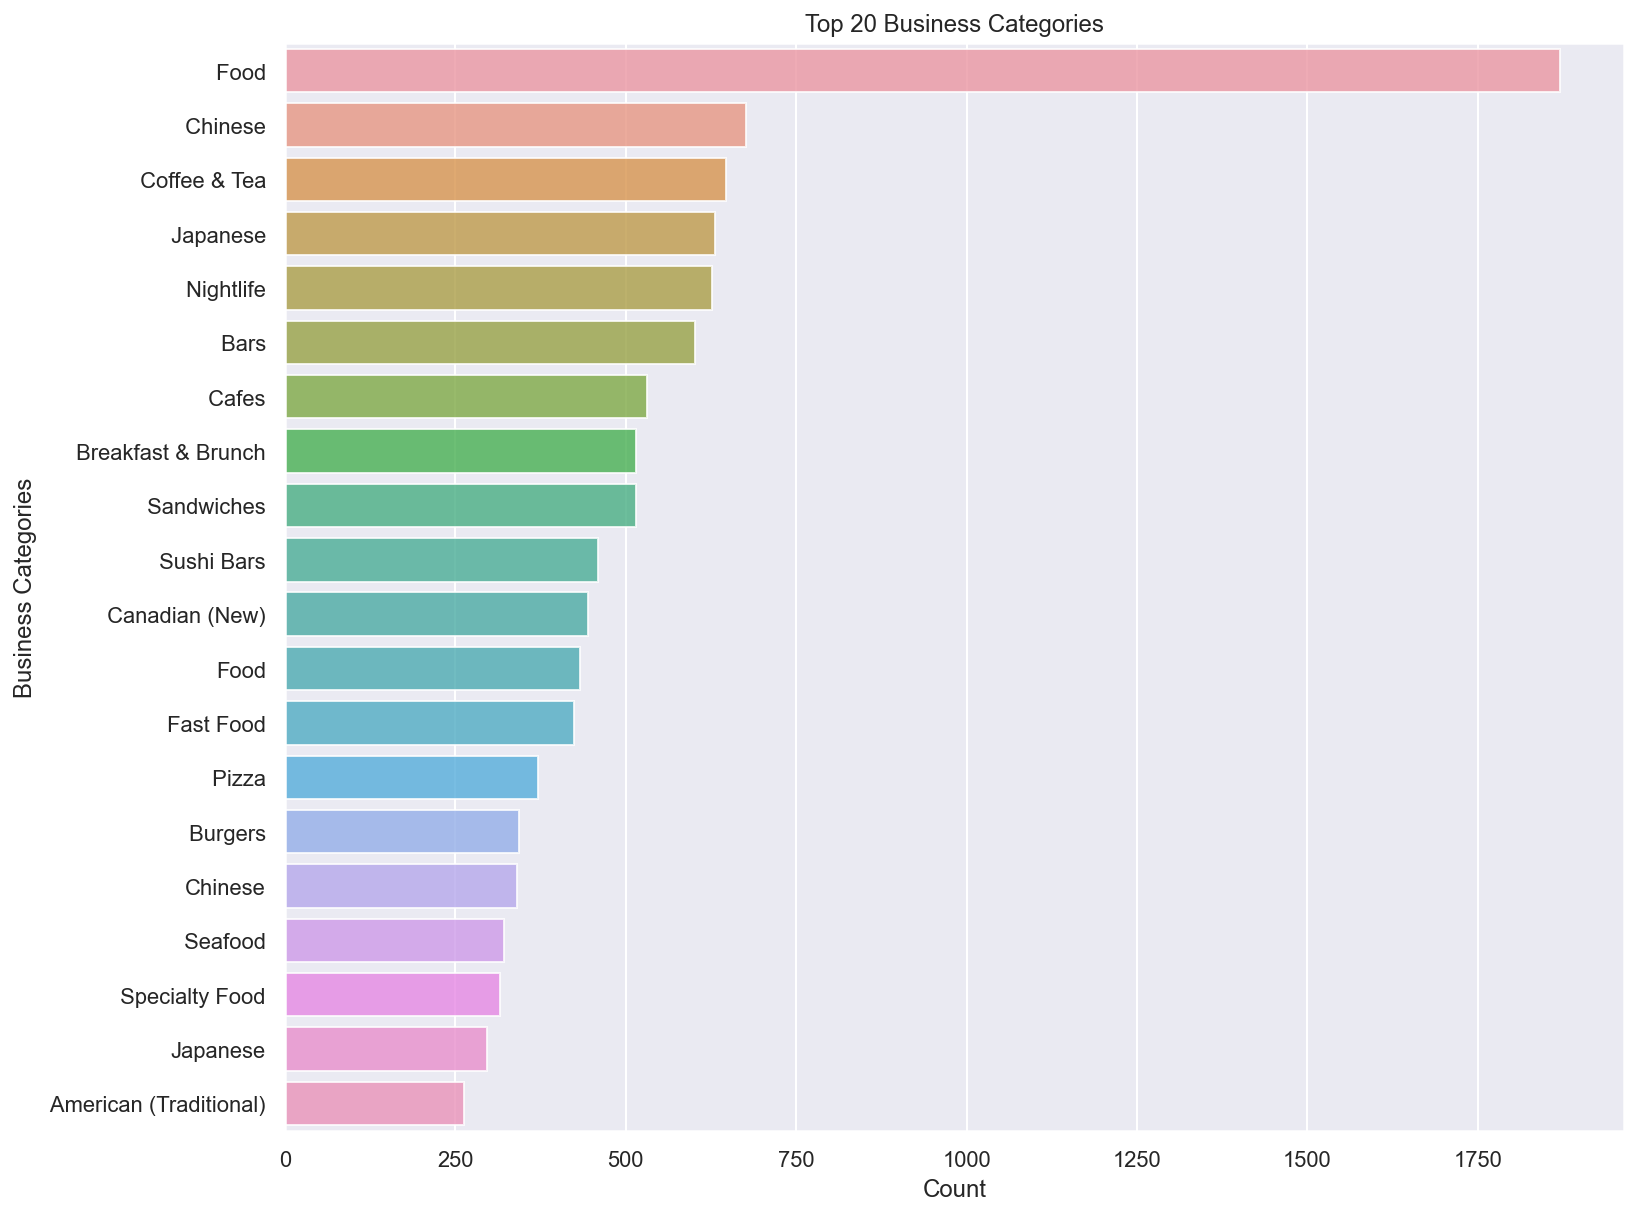

In [112]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(x=top_20_cat.number, y=top_20_cat.index, data=top_20_cat, alpha=0.8, orient='h')
ax.set_title("Top 20 Business Categories")
ax.set_ylabel("Business Categories")
ax.set_xlabel("Count")
plt.show();

In [113]:
fig = px.bar(top_20_cat, x=top_20_cat.number, y=top_20_cat.index, text=top_20_cat.number, orientation='h', 
             color=top_20_cat.index, 
             color_discrete_sequence=px.colors.qualitative.Alphabet_r)
fig.update_layout(xaxis=dict(
        title="Count", 
        titlefont=dict(size=16)), 
                  yaxis=dict(
                      title="Business Category", 
                      titlefont=dict(size=16)),
                 height=700,
                 width=1000,
                 title="Top 20 Business Categories",
                 )
fig.show()

The above code is quite messy and dirty. I tried a few different methods to turn the categories column into a list and then add that into the dataframe but the one I settles on was the result directly above. Moving on the visualizing the top 50 

In [114]:
top_50_cat = category_count.sort_values('number', ascending=False).head(50)
top_50_cat

,number,percentage,avg_stars
Food,1871,24.926725,3.531267
Chinese,677,9.019451,3.314623
Coffee & Tea,647,8.619771,3.510819
Japanese,631,8.406608,3.505547
Nightlife,626,8.339995,3.508786
Bars,602,8.020250,3.498339
Cafes,531,7.074341,3.747646
Breakfast & Brunch,515,6.861178,3.496117
Sandwiches,515,6.861178,3.541748
Sushi Bars,459,6.115108,3.472767


In [115]:
fig = px.bar(top_50_cat, x=top_50_cat.number, y=top_50_cat.index, text=top_50_cat.number, orientation='h', 
             color=top_50_cat.index, 
             color_discrete_sequence=px.colors.qualitative.Alphabet_r)
fig.update_layout(xaxis=dict(
        title="Count", 
        titlefont=dict(size=16)), 
                  yaxis=dict(
                      title="Business Category", 
                      titlefont=dict(size=16)),
                 height=700,
                 width=1000,
                 title="Top 50 Business Categories",
                 )
fig.show()